In [152]:
import numpy as np 
import pandas as pd
import seaborn as sns
import csv
import re
import nltk
import random
import string

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator


from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer


from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import nltk
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize

import numpy as np 
import pandas as pd
import seaborn as sns
import csv
import re
import nltk
import random
import string

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator


from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer


from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import os, sys, logging, traceback, codecs, datetime, copy, time, ast, math, re, random, shutil, json, csv, multiprocessing, subprocess
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import collections
import sklearn
from sklearn.feature_extraction.text import CountVectorizer


import nltk
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')



import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

from collections import Counter

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Hartej/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Hartej/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Hartej/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Hartej/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [153]:
#Import datasets 

twitter_df=pd.read_csv("./Tweets3.csv", sep=",", names=['created_at', 'full_text'])

twitter_df['source'] = 'twitter'

#Import imdb data to pandas dataframe

reddit_df=pd.read_csv("./Reddit.csv", sep=",", names=['created_at', 'full_text'])

reddit_df['source'] = 'reddit'

#Import amazon data to pandas dataframe

news_df=pd.read_csv("./News.csv", sep=",", names=['created_at', 'full_text'])

news_df['source'] = 'news'

In [154]:
# Concatinate the data to one data frame
data=pd.concat([twitter_df,reddit_df,news_df])

In [155]:
#Format/Description 

In [156]:
data.describe()

,created_at,full_text,source
count,8745,8680,9098
unique,8389,8166,3
top,"7:12 PM ET Tue, 29 Jan 2019","""Mad Money"" host Jim Cramer rings the lightnin...",twitter
freq,6,147,5002


In [157]:
print('Dataset size:',data.shape)
print('Columns are:',data.columns)

Dataset size: (9098, 3)
Columns are: Index(['created_at', 'full_text', 'source'], dtype='object')


In [158]:
#Original size of datasets 

print('Dataset size:',data[data['source'] == 'twitter'].shape)
print('Dataset size:',data[data['source'] == 'reddit'].shape)
print('Dataset size:',data[data['source'] == 'news'].shape)

Dataset size: (5002, 3)
Dataset size: (1015, 3)
Dataset size: (3081, 3)


In [159]:
#Values missing  = Yes

data.isnull().sum()

created_at    353
full_text     418
source          0
dtype: int64

In [160]:
#Drop null values and create new data frame = data1

data1 = data.dropna()

In [161]:
#Values missing  = None

data1.isnull().sum()

created_at    0
full_text     0
source        0
dtype: int64

In [162]:
data1.head(5)

,created_at,full_text,source
NaN,created_at,full_text,twitter
0.0,created_at,text,twitter
1.0,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",twitter
2.0,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,twitter
3.0,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,twitter


In [163]:
#Values missing  

data1.isnull().sum()

created_at    0
full_text     0
source        0
dtype: int64

In [164]:
data1 = data1.drop_duplicates(subset=['full_text'])

In [165]:
# New size of datasets after dropping null values and duplicates 

print('Dataset size:',data1[data1['source'] == 'twitter'].shape)
print('Dataset size:',data1[data1['source'] == 'reddit'].shape)
print('Dataset size:',data1[data1['source'] == 'news'].shape)

Dataset size: (4845, 3)
Dataset size: (702, 3)
Dataset size: (2619, 3)


In [166]:
data1.drop(0, axis=0, inplace=True)
#data1.drop(1, axis=0, inplace=True)
#data1.drop("id", axis=1, inplace=True)

In [167]:
data1.head()

,created_at,full_text,source
NaN,created_at,full_text,twitter
1.0,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",twitter
2.0,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,twitter
3.0,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,twitter
4.0,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,twitter


In [168]:
data1.reset_index(inplace=True)
data1

,index,created_at,full_text,source
0,NaN,created_at,full_text,twitter
1,1.0,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",twitter
2,2.0,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,twitter
3,3.0,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,twitter
4,4.0,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,twitter
...,...,...,...,...
8159,3076.0,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f...",news
8160,3077.0,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...,news
8161,3078.0,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...,news
8162,3079.0,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di...",news


In [169]:
#data1.drop(['level_0', 'index'],axis =1, inplace=True)
data1.drop(['index'],axis =1, inplace=True)
data1

,created_at,full_text,source
0,created_at,full_text,twitter
1,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",twitter
2,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,twitter
3,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,twitter
4,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,twitter
...,...,...,...
8159,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f...",news
8160,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...,news
8161,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...,news
8162,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di...",news


In [170]:
data1.drop(0, axis=0, inplace=True)
data1

,created_at,full_text,source
1,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",twitter
2,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,twitter
3,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,twitter
4,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,twitter
5,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,twitter
...,...,...,...
8159,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f...",news
8160,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...,news
8161,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...,news
8162,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di...",news


In [171]:
# Removed time
date = [pd.to_datetime(i).date() for i in data1.created_at]
data1.created_at = date
data1.head()

,created_at,full_text,source
1,2020-04-15,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",twitter
2,2020-06-25,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,twitter
3,2020-06-04,Net issuance increases to fund fiscal programs...,twitter
4,2020-07-03,RT @bentboolean: How much of Amazon's traffic ...,twitter
5,2020-07-09,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,twitter


In [172]:
#Combine data wise
new_data = pd.DataFrame(columns=["created_at", "full_text", "source"])
for i in data1.created_at.unique():
    same_data = data1[data1.created_at == i]
    row = same_data.head(1)
    text = ""
    for j in same_data.full_text:
        text = text + " " + j
    
    data_to_append = {"created_at": row.created_at.values[0], "full_text": text, "source": row.source.values[0]}
    new_data = new_data.append(data_to_append, ignore_index=True)

In [173]:
data1 = new_data
data1.head()

,created_at,full_text,source
0,2020-04-15,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mo...",twitter
1,2020-06-25,#SriLanka surcharge on fuel removed!\n⛽📉\nThe...,twitter
2,2020-06-04,Net issuance increases to fund fiscal program...,twitter
3,2020-07-03,RT @bentboolean: How much of Amazon's traffic...,twitter
4,2020-07-09,$AMD Ryzen 4000 desktop CPUs looking ‘great’ ...,twitter


In [174]:
#Weekend removal

In [175]:
#Pre-processing 

In [176]:
#Stopwords

stopwords = nltk.corpus.stopwords.words('english')
data1['pro'] = data1['full_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [177]:
# Below list represents objects; did not take all the intersected words into consideration
stopwords.extend(['one', 'make','get', 'go', 'like', 'This', 'today', 'imgur','in','is',
                  'see', 'also', 'would', 'think', 'come','say', 'look', 'could', 'back',
                  'to','for','RT', 'Jim', 'Cramer', 'says', 'The',
                  'even', 'group', 'say', 'look', 'could', 'back','•', 'CLICK', 'FOR', 'HERE'])
# stopwords.extend(['movie', 'film', 'phone', 'food', 'place','service', 'product'])
# "not" can be used in "not good" as well as "not bad", so removing it from the list is important
# "really" and "very" were removed as with using bigrams, they can show more emphasis whether an item is
## very good or really bad
#stopwords = [e for e in stopwords if e not in ('no', 'nor', 'not')]

In [178]:
#Removed mentions, hastags, RT, hyperlinks 
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    return text 

In [179]:
data1['pro']= data1['pro'].apply(clean_text)

In [180]:
data1.head()

,created_at,full_text,source,pro
0,2020-04-15,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mo...",twitter,": Yo💥 Enter WIN 1,000 Monarch Tokens✅ US Stock..."
1,2020-06-25,#SriLanka surcharge on fuel removed!\n⛽📉\nThe...,twitter,SriLanka surcharge fuel removed! ⛽📉 The surcha...
2,2020-06-04,Net issuance increases to fund fiscal program...,twitter,Net issuance increases fund fiscal programs &g...
3,2020-07-03,RT @bentboolean: How much of Amazon's traffic...,twitter,: How much Amazon's traffic served Fastly? Hel...
4,2020-07-09,$AMD Ryzen 4000 desktop CPUs looking ‘great’ ...,twitter,$AMD Ryzen 4000 desktop CPUs looking ‘great’ t...


In [181]:
#lemmatization

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

data1['pro'] = data1['pro'].apply(lambda x: lemmatizer(x))

In [182]:
# data1.head()

In [183]:
# VADER 

In [184]:
# #Initiate the VADER Sentiment Analyzer

analyzer = SentimentIntensityAnalyzer()

In [185]:
# Get Compound Score of Each text in the DataFrame using VADER
data1['compound'] = [analyzer.polarity_scores(x)['compound'] for x in data1['pro']]

In [186]:
#from textblob import TextBlob

In [187]:
# Function to calculate polarityy
#def get_polarity(text):
#    return TextBlob(text).sentiment.polarity

# Caluculating Polarity of text
#data1["polarity"] = data1["pro"].apply(get_polarity)

In [188]:
data1.head()

,created_at,full_text,source,pro,compound
0,2020-04-15,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mo...",twitter,"[:, , Y, o, 💥, , E, n, t, e, r, , W, I, N, ...",0.9972
1,2020-06-25,#SriLanka surcharge on fuel removed!\n⛽📉\nThe...,twitter,"[S, r, i, L, a, n, k, a, , s, u, r, c, h, a, ...",0.9993
2,2020-06-04,Net issuance increases to fund fiscal program...,twitter,"[N, e, t, , i, s, s, u, a, n, c, e, , i, n, ...",0.9989
3,2020-07-03,RT @bentboolean: How much of Amazon's traffic...,twitter,"[:, , H, o, w, , m, u, c, h, , A, m, a, z, ...",0.9881
4,2020-07-09,$AMD Ryzen 4000 desktop CPUs looking ‘great’ ...,twitter,"[$, A, M, D, , R, y, z, e, n, , 4, 0, 0, 0, ...",0.9994


In [190]:
#Set VADER Sentiment Class to Positive if compound > 0 and to Negative if compound < 0 
data1['prediction_vader'] = data1['compound'].apply(lambda x: 1 if x > 0 else -1)

In [191]:
data1.head()

,created_at,full_text,source,pro,compound,prediction_vader
0,2020-04-15,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mo...",twitter,"[:, , Y, o, 💥, , E, n, t, e, r, , W, I, N, ...",0.9972,1
1,2020-06-25,#SriLanka surcharge on fuel removed!\n⛽📉\nThe...,twitter,"[S, r, i, L, a, n, k, a, , s, u, r, c, h, a, ...",0.9993,1
2,2020-06-04,Net issuance increases to fund fiscal program...,twitter,"[N, e, t, , i, s, s, u, a, n, c, e, , i, n, ...",0.9989,1
3,2020-07-03,RT @bentboolean: How much of Amazon's traffic...,twitter,"[:, , H, o, w, , m, u, c, h, , A, m, a, z, ...",0.9881,1
4,2020-07-09,$AMD Ryzen 4000 desktop CPUs looking ‘great’ ...,twitter,"[$, A, M, D, , R, y, z, e, n, , 4, 0, 0, 0, ...",0.9994,1


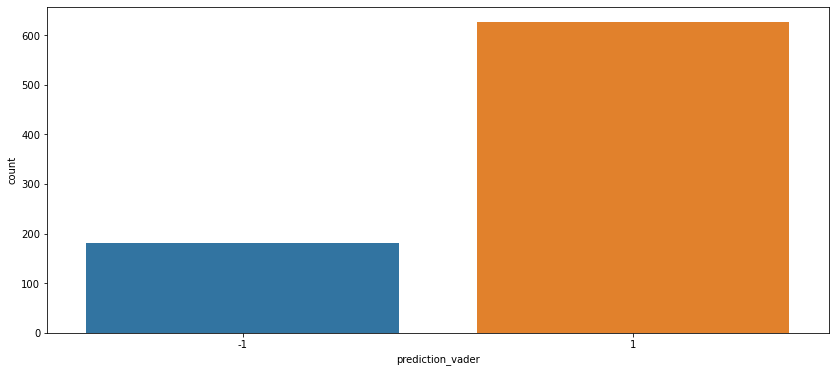

In [192]:
plt.figure(figsize=(14, 6))
sns.countplot(x = 'prediction_vader', data = data1)
plt.show()

In [193]:
# Saving final dataset
data1.to_csv("final_polarity_data.csv")